# EJemplo Proyecto PLN
---

In [ ]:
!pip install numpy==1.24.4 --quiet
!pip install gensim --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 30.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 

In [ ]:
import pandas as pd
import numpy as np
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator
from gensim.models import Word2Vec

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

In [ ]:
!wget https://raw.githubusercontent.com/cagomezv/PNL/refs/heads/main/df_clean.csv   #Dataframe Limpio. Resultado de la entrega anterior del proyecto final.

--2025-04-20 17:18:24--  https://raw.githubusercontent.com/cagomezv/PNL/refs/heads/main/df_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18105666 (17M) [text/plain]
Saving to: ‘df_clean.csv’

df_clean.csv        100%[===================>]  17.27M   108MB/s    in 0.2s    

2025-04-20 17:18:25 (108 MB/s) - ‘df_clean.csv’ saved [18105666/18105666]



In [ ]:
df = pd.read_csv('df_clean.csv')
df.head()

,Title_clean,Authors_clean,Description_clean,Cluster
0,bedroom,dubus andre,seven story collect include killing basis todd...,2
1,captain kate,reeder carolyn,civil war rage kate enlist aid stepbrother set...,2
2,essential cell biology second edition,roberts keith alberts bruce bray dennis lewis ...,text undergraduate provide straightforward exp...,2
3,lose weight smart low carb way 200 high flavor...,newman bettina,atkin south beach diet low carb diet take coun...,7
4,melting pot subversive story,schwartz lynne sharon,dramatize warfare people s illusion truth fant...,6


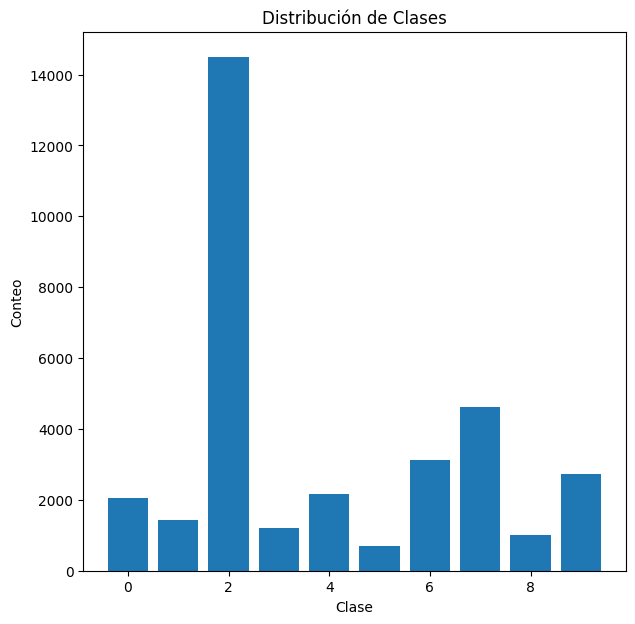

In [ ]:
variable_obj = df['Cluster']
etiquetas_obj, conteo_etiquetas = np.unique(variable_obj,return_counts=True)

fig, (ax1) = plt.subplots(1, 1, figsize=(7, 7))

ax1.bar(etiquetas_obj, conteo_etiquetas)
ax1.set_title('Distribución de Clases')

ax1.set_xlabel('Clase')
ax1.set_ylabel('Conteo')

plt.show()

La gráfica presenta un histograma que muestra el número de ejemplos asociados a cada una de las clases en un problema de clasificación multiclase. En el eje horizontal (X) se encuentran representadas las distintas clases, numeradas del 0 al 9, mientras que en el eje vertical (Y) se indica el conteo de instancias correspondientes a cada clase. A partir de la inspección visual del gráfico, se observa una distribución notablemente desbalanceada, siendo la clase 2 la más frecuente, con más de 14.000 ejemplos, lo que contrasta significativamente con otras clases como la 5 y la 8, que tienen menos de 1.000 registros cada una.

Este tipo de distribución puede generar problemas importantes al momento de entrenar los modelos de clasificación que estamos prestos a realizar, dado que los algoritmos tienden a favorecer las clases mayoritarias, disminuyendo su capacidad de generalización sobre clases con baja representación. Lo que podria darnos un modelo entrenado sobre estos datos, probablemente muestre un alto valor de precisión global (accuracy), mientras que su desempeño en clases minoritarias sería deficiente, ocultando sesgos y graves errores.

Por consiguiente es fundamental considerar estrategias específicas para el balanceo de clases antes de iniciar. Entre ellas se encuentran el sobremuestreo de clases minoritarias (por ejemplo, utilizando técnicas como SMOTE), el submuestreo de clases mayoritarias, la utilización de métricas más informativas como el F1-score por clase o la matriz de confusión, y la aplicación de técnicas que ajusten la función de pérdida del modelo mediante ponderaciones que penalicen más los errores en clases poco representadas.


## **1. Tipo de Modelamiento**
---

Seleccione el tipo de modelo que puede usar para dar respuesta al problema de NLP. Recuerde que dispone de modelos que incluyen:

- **Regresión**: se busca estimar un valor continúo a partir de los textos.
- **Clasificación**: permite estimar un valor categórico a partir de los textos.
- **Agrupamiento**: permite encontrar grupos de documentos similares.
- **Modelos de tópicos**: permite encontrar temas/tópicos dentro del corpus e interpretarlo.
- **Otros modelos**: recuerde que dispone de otros tipos de tareas supervisadas y no supervisadas desde NLP. Puede utilizar modelos pre-enternados con el fin de dar una solución.

Justifique la selección del modelo.

## **2. Implementación del modelo**
---

A continuación encuentra los pasos que puede seguir para la implementación de un modelo:

In [ ]:
# Particicionamiento de los Datos

# Elementos en cada clase
min_size = df['Cluster'].value_counts().min()

df = (df.groupby('Cluster', group_keys=False).apply(lambda x: x.sample(min_size, random_state=42)).reset_index(drop=True))

# Particionamos los datos balanceados
X_train, X_test, y_train, y_test = train_test_split(
    df['Description_clean'],
    df['Cluster'],
    test_size=0.15,
    random_state=42,
    stratify=df['Cluster']  # Esto garantiza que la distribución por clase se mantenga
)

<ipython-input-5-ee94b3535cbe>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = (df.groupby('Cluster', group_keys=False).apply(lambda x: x.sample(min_size, random_state=42)).reset_index(drop=True))


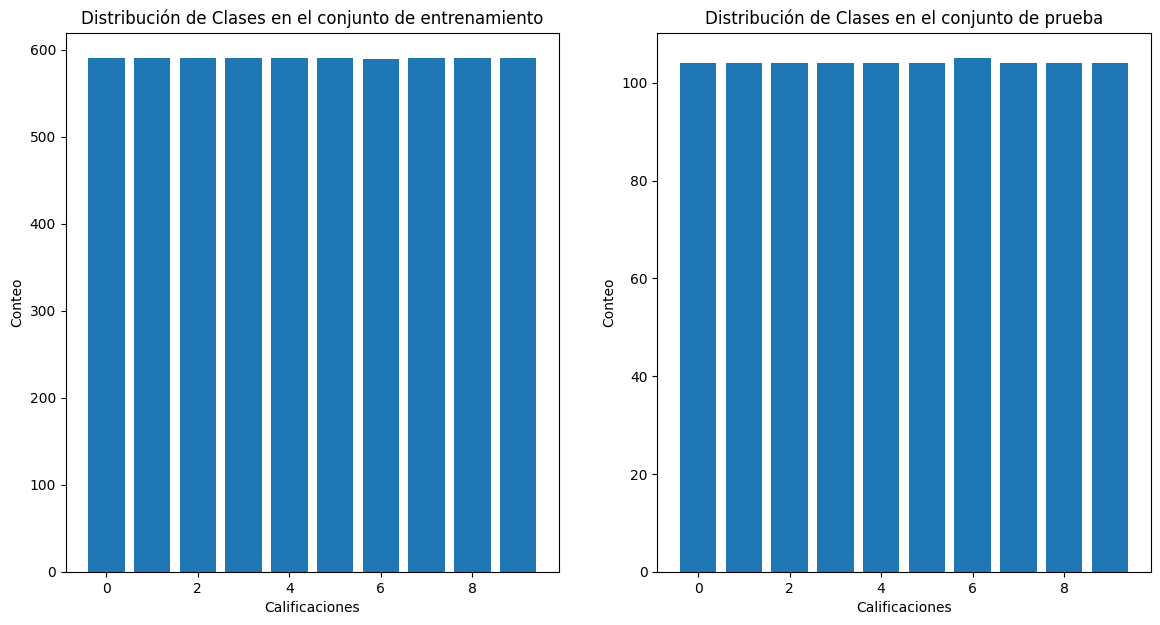

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14, 7))

variable_obj = y_train
etiquetas_obj, conteo_etiquetas = np.unique(variable_obj,return_counts=True)
ax1.bar(etiquetas_obj, conteo_etiquetas)
ax1.set_title('Distribución de Clases en el conjunto de entrenamiento')
ax1.set_xlabel('Calificaciones')
ax1.set_ylabel('Conteo')

variable_obj = y_test
etiquetas_obj, conteo_etiquetas = np.unique(variable_obj,return_counts=True)
ax2.bar(etiquetas_obj, conteo_etiquetas)
ax2.set_title('Distribución de Clases en el conjunto de prueba')
ax2.set_xlabel('Calificaciones')
ax2.set_ylabel('Conteo')

plt.show()

La gráficas arriban muestran la distribución de clases en los conjuntos de entrenamiento y prueba de un problema de clasificación. Cada gráfico de barras presenta en el eje X las distintas clases posibles (de 0 a 9) y en el eje Y el conteo de cuántas veces aparece cada una. Se observa un marcado desbalance en los datos: la clase 2 es la más frecuente por un amplio margen, con más de 12,000 ejemplos en el subset de entrenamiento y más de 2,000 en el subset de prueba, mientras que las otras clases tienen una representación mucho menor.

A pesar del desbalance, de por si ya notorio en el conjunto de clases. Se puede observar como positivo que ambas particiones, tanto en entrenamiento, como en el conjunto de prueba mantengan proporciones similares de clases, lo que sugiere que se utilizó un muestreo estratificado al dividir los datos. Sin embargo, para abordar el problema del desbalance, se emplearan métricas más robustas como el F1-score o el recall por clase, e incluso, el uso de modelos con ajustes de ponderación por clase (class_weight='balanced').

### **2.1 Importación, Entrenamiento y Ajuste de Hiperparametros de los Modelos**
---

Seleccione la librería de NLP que utilizará para el modelo e impórtelo:

# **Escenario 1:**

Vamos a hacer un concurso de modelos de Machine Learning para clasificar textos usando la columna Description_clean con embeddings TF-IDF y la etiqueta Cluster como clase objetivo. Se usaran 5 algoritmos:

- Multinomial Naive Bayes: Un algortimos clásico para texto.
- Logistic Regression: Algortimo lineal y rápido.
- Random Forest: Algoritmo de ensamble de árboles.
- Support Vector Machine (SVM): Algoritmo muy robusto en tareas de clasificación.
- Gradient Boosting (XGBoost): Algortimo muy potente y moderno.

El código a continuación comienza extrayendo las columnas relevantes del dataset: Description_clean como característica independiente (X) y Cluster como variable objetivo (y). Estas columnas contienen, respectivamente, los textos limpios que describen los ítems y las clases a las que cada uno pertenece. Posteriormente, se realiza una división del conjunto de datos en entrenamiento y prueba, destinando el 80% de los datos al entrenamiento y el 20% restante a la evaluación. Esta división se hace de forma aleatoria y reproducible, gracias a la semilla impuesta en random_state=42.

A continuación, se define un diccionario llamado model_configs que contiene cinco modelos clásicos de clasificación supervisada: Naive Bayes, Regresión Logística, Random Forest, SVM lineal y XGBoost. Para cada modelo se especifica la instancia del clasificador y un conjunto de hiperparámetros a evaluar mediante búsqueda exhaustiva (GridSearchCV). La notación clf__parametro utilizada en los diccionarios de hiperparámetros hace referencia a que el modelo será parte de un pipeline, donde clf es el nombre asignado al paso del clasificador.

Dentro de un ciclo for, el código recorre cada uno de los modelos definidos. Para cada uno, se construye un pipeline con dos pasos: primero, la vectorización de texto mediante TfidfVectorizer, que transforma los documentos en vectores numéricos ponderados según la frecuencia de término-inverso de documento (TF-IDF), eliminando las palabras vacías del inglés y limitando el número total de características a 5000; segundo, el clasificador en cuestión. Este pipeline se entrena utilizando GridSearchCV, que combina el pipeline con los hiperparámetros específicos del modelo y realiza una validación cruzada de 5 pliegues sobre el conjunto de entrenamiento. El objetivo es encontrar la combinación de hiperparámetros que maximice la exactitud del modelo.

Una vez completada la búsqueda, se extrae el mejor modelo encontrado (best_estimator_) y se evalúa su desempeño sobre el conjunto de prueba. Se calculan las predicciones y se compara con las etiquetas reales utilizando accuracy_score, que mide la proporción de aciertos. Se imprime también un reporte de clasificación con métricas como precisión, exhaustividad (recall) y F1-score por clase. Además, se visualiza la matriz de confusión correspondiente, lo cual permite observar visualmente qué clases fueron mejor clasificadas.

Todos los resultados (nombre del modelo, exactitud en el conjunto de prueba, mejores hiperparámetros y el modelo entrenado) se almacenan en una lista para su comparación posterior. A medida que se recorren los modelos, también se guarda una referencia al modelo con el mejor desempeño general, de modo que al final del proceso se pueda identificar cuál fue el clasificador más efectivo.

Tras completar la evaluación de todos los modelos, se ordenan los resultados por exactitud de forma descendente y se grafican en un diagrama de barras. Esto facilita la comparación visual de qué modelos lograron mejor desempeño. Finalmente, el mejor modelo obtenido se guarda en disco utilizando la librería joblib, con un nombre de archivo que identifica el tipo de modelo y sus hiperparámetros óptimos.

Con este flujo de trabajo automatizado se puede comparar múltiples clasificadores supervisados aplicados al problema de clasificación de textos en el que nos encontramos inmersos. Los pipelines incorporados nos permitieron integrar el preprocesamiento y la clasificación en una misma estructura, realiza búsqueda de hiperparámetros con validación cruzada, y herramientas gráficas y cuantitativas para evaluar el rendimiento de cada modelo.


Entrenando modelo: Naive Bayes
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Accuracy en test: 0.5879
Mejores parámetros: {'clf__alpha': 0.5}
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       139
           1       0.60      0.73      0.66       138
           2       0.49      0.22      0.30       139
           3       0.59      0.61      0.60       139
           4       0.59      0.64      0.61       139
           5       0.70      0.79      0.74       139
           6       0.50      0.47      0.49       139
           7       0.67      0.73      0.70       139
           8       0.48      0.54      0.51       138
           9       0.61      0.60      0.60       139

    accuracy                           0.59      1388
   macro avg       0.58      0.59      0.58      1388
weighted avg       0.58      0.59      0.58      1388



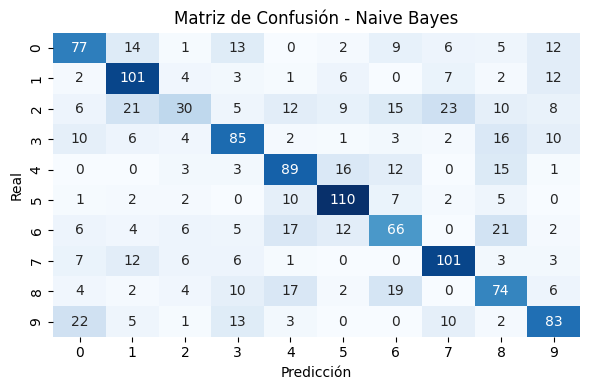


Entrenando modelo: Logistic Regression
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Accuracy en test: 0.6059
Mejores parámetros: {'clf__C': 1}
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.61      0.55      0.58       139
           1       0.62      0.73      0.67       138
           2       0.42      0.28      0.34       139
           3       0.64      0.67      0.65       139
           4       0.63      0.63      0.63       139
           5       0.76      0.77      0.76       139
           6       0.49      0.55      0.52       139
           7       0.68      0.73      0.70       139
           8       0.51      0.54      0.53       138
           9       0.64      0.61      0.63       139

    accuracy                           0.61      1388
   macro avg       0.60      0.61      0.60      1388
weighted avg       0.60      0.61      0.60      1388



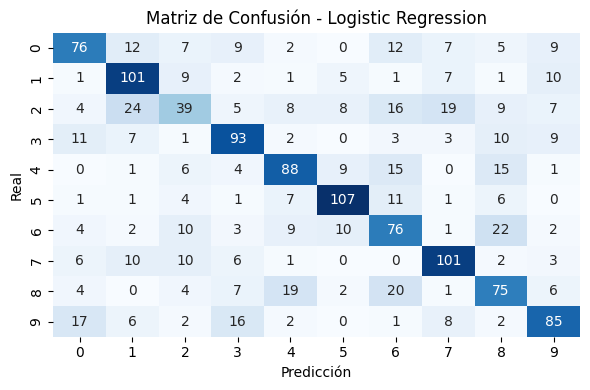


Entrenando modelo: Random Forest
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Accuracy en test: 0.5540
Mejores parámetros: {'clf__max_depth': None, 'clf__n_estimators': 200}
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.58      0.53      0.55       139
           1       0.47      0.77      0.58       138
           2       0.51      0.14      0.22       139
           3       0.56      0.64      0.60       139
           4       0.57      0.61      0.59       139
           5       0.66      0.71      0.69       139
           6       0.50      0.42      0.46       139
           7       0.59      0.63      0.61       139
           8       0.50      0.53      0.52       138
           9       0.61      0.56      0.58       139

    accuracy                           0.55      1388
   macro avg       0.56      0.55      0.54      1388
weighted avg       0.56      0.55      0.54      1388



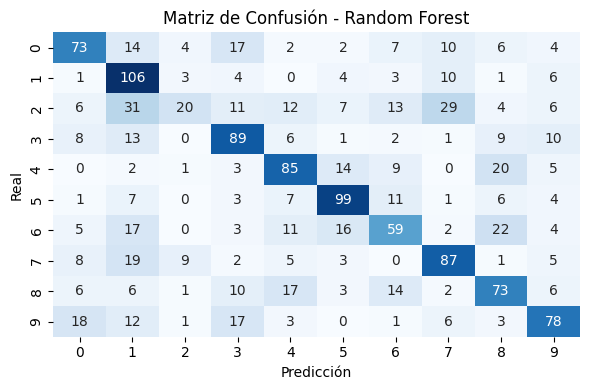


Entrenando modelo: SVM (LinearSVC)
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Accuracy en test: 0.6009
Mejores parámetros: {'clf__C': 0.1}
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.61      0.55      0.58       139
           1       0.57      0.73      0.64       138
           2       0.49      0.23      0.31       139
           3       0.62      0.65      0.63       139
           4       0.64      0.66      0.65       139
           5       0.71      0.81      0.76       139
           6       0.51      0.52      0.51       139
           7       0.65      0.73      0.69       139
           8       0.53      0.53      0.53       138
           9       0.61      0.60      0.61       139

    accuracy                           0.60      1388
   macro avg       0.59      0.60      0.59      1388
weighted avg       0.59      0.60      0.59      1388



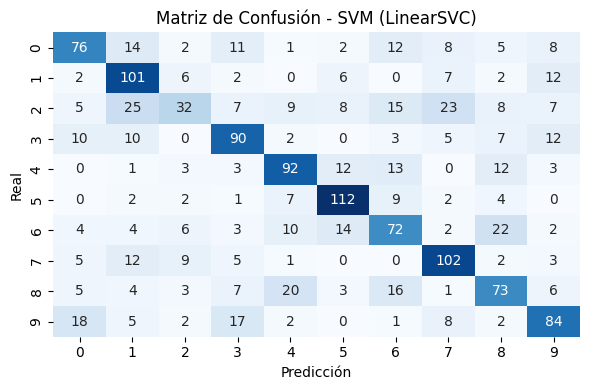


Entrenando modelo: XGBoost
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:40:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy en test: 0.5310
Mejores parámetros: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 100}
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.52      0.48      0.50       139
           1       0.46      0.69      0.55       138
           2       0.32      0.21      0.25       139
           3       0.61      0.55      0.58       139
           4       0.59      0.61      0.60       139
           5       0.74      0.65      0.69       139
           6       0.44      0.43      0.44       139
           7       0.61      0.62      0.62       139
           8       0.46      0.49      0.47       138
           9       0.54      0.58      0.56       139

    accuracy                           0.53      1388
   macro avg       0.53      0.53      0.53      1388
weighted avg       0.53      0.53      0.53      1388



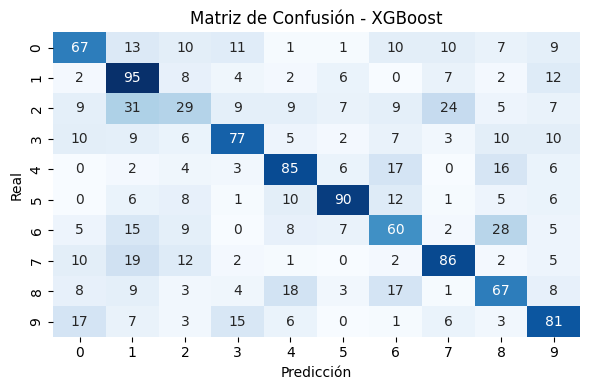

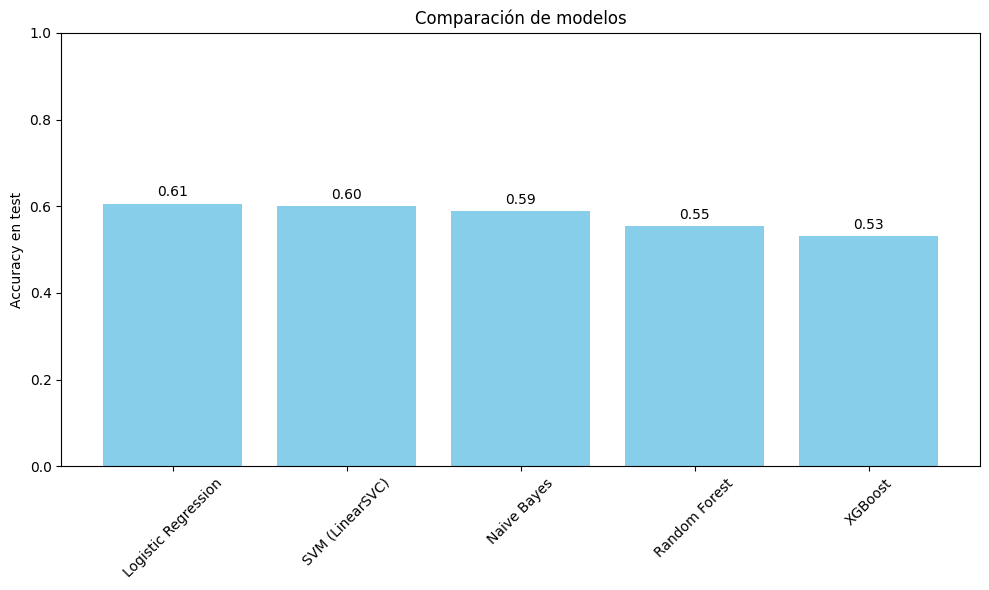


Mejor modelo: Logistic Regression con Accuracy = 0.6059


['mejor_modelo_Logistic_Regression.pkl']

In [ ]:
# ---**INGRESE SU CÓDIGO**---
# 1. Features y etiquetas
X = df["Description_clean"]
y = df["Cluster"]

# 2. División train/test con clases balanceadas
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Modelos y parámetros (con class_weight donde aplica)
model_configs = {
    "Naive Bayes": {
        "model": MultinomialNB(),
        "params": {"clf__alpha": [0.1, 0.5, 1.0]}
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, class_weight='balanced'),
        "params": {"clf__C": [0.1, 1, 10]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=1),
        "params": {
            "clf__n_estimators": [100, 200],
            "clf__max_depth": [None, 10, 20]
        }
    },
    "SVM (LinearSVC)": {
        "model": LinearSVC(class_weight='balanced'),
        "params": {"clf__C": [0.1, 1, 10]}
    },

    "XGBoost": {
    "model": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=1),
    "params": {
        "clf__n_estimators": [100],
        "clf__max_depth": [3],
        "clf__learning_rate": [0.1]
          }
    }
}

# 4. Entrenar con GridSearchCV
results = []
best_overall_model = None
best_overall_acc = 0

for name, config in model_configs.items():
    print(f"\nEntrenando modelo: {name}")

    pipeline = Pipeline([
        ("tfidf", TfidfVectorizer(stop_words="english", max_features=5000)),
        ("clf", config["model"])
    ])

    grid = GridSearchCV(pipeline, config["params"], cv=5, n_jobs=2, scoring='accuracy', verbose=1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results.append((name, acc, grid.best_params_, best_model))

    print(f"Accuracy en test: {acc:.4f}")
    print(f"Mejores parámetros: {grid.best_params_}")
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    if acc > best_overall_acc:
        best_overall_acc = acc
        best_overall_model = best_model
        best_model_name = name

# 5. Gráfico comparativo
results.sort(key=lambda x: x[1], reverse=True)
names = [x[0] for x in results]
scores = [x[1] for x in results]

plt.figure(figsize=(10, 6))
bars = plt.bar(names, scores, color='skyblue')
plt.title("Comparación de modelos")
plt.ylabel("Accuracy en test")
plt.ylim(0, 1)
plt.xticks(rotation=45)
for bar, score in zip(bars, scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{score:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

# 6. Guardar el mejor modelo
print(f"\nMejor modelo: {best_model_name} con Accuracy = {best_overall_acc:.4f}")
joblib.dump(best_overall_model, f"mejor_modelo_{best_model_name.replace(' ', '_')}.pkl")

# **Conclusiones Escenario 1:**

De los principales resultados obtenidos se puede encontrar que al evaluar el modelo Naive Bayes, el cual obtuvo una accuracy en el conjunto de prueba de 0.5879. Modelo ajustado con un parámetro de suavizado alpha = 0.5, que resultó ser el mejor tras la búsqueda en grilla. A pesar de su simplicidad, Naive Bayes mostró un rendimiento moderado. Se destacan clases como la 1 y la 5, donde el modelo alcanzó un recall de 0.73 y 0.79 respectivamente, lo que sugiere que fue especialmente eficaz en identificar instancias positivas de esas clases. Sin embargo, el rendimiento en la clase 2 fue bajo (recall de 0.22 y f1-score de 0.30), lo que indica dificultad para distinguir esta categoría, posiblemente debido a superposición de características entre clases o desequilibrio en los datos. En general, los valores promedio (macro avg y weighted avg) giraron en torno a 0.58–0.59, evidenciando un comportamiento aceptable pero no competitivo frente a modelos más complejos.

El modelo Logistic Regression mostró el mejor desempeño global entre los cinco, con una accuracy de 0.6059 y un mejor parámetro C = 1. Este modelo, a pesar de su linealidad, logró una buena generalización. Los valores de precision y recall fueron más balanceados en casi todas las clases, y especialmente altos en la clase 5, con un f1-score de 0.76. Aunque persistieron algunas debilidades, como en la clase 2 (f1-score de 0.34), la regresión logística se comportó de manera sólida en términos de promedio ponderado (weighted avg f1-score de 0.60), lo que indica un rendimiento equilibrado entre clases, probablemenete debido que se garantizo el equilibrio de las mismas.

El modelo Random Forest, por su parte, obtuvo una accuracy más baja (0.5540), incluso a pesar de haber sido optimizado con n_estimators = 200 y max_depth = None, lo cual permite árboles sin profundidad limitada. Aunque mostró buen desempeño en clases como la 1 (recall de 0.77), falló notoriamente en otras como la clase 2, con un recall de apenas 0.14 y un f1-score de 0.22. Este comportamiento sugiere que, pese a la capacidad de Random Forest para capturar relaciones no lineales, puede ser sensible a la calidad del preprocesamiento de datos o al ruido en clases específicas. En términos generales, sus métricas promedio se mantuvieron por debajo de los 0.55, ubicándolo como uno de los modelos con menor efectividad global.

En el caso del modelo SVM (LinearSVC), se obtuvo una accuracy de 0.6009 con el mejor valor de C = 0.1, lo que indica una penalización relativamente fuerte a los errores de clasificación, favoreciendo la simplicidad del modelo. Este clasificador mostró un rendimiento general muy similar al de la regresión logística, destacando también en clases como la 5 (f1-score de 0.76) y la 7 (f1-score de 0.69), manteniéndose bastante estable en las demás. Al igual que los anteriores, la clase 2 volvió a ser problemática, con un f1-score de solo 0.31. A pesar de esto, los valores promedios rondaron los 0.59–0.60, posicionando al modelo como una alternativa competitiva a la regresión logística.

Finalmente, el modelo XGBoost, a pesar de ser uno de los algoritmos más potentes para tareas de clasificación, tuvo el peor desempeño en este escenario con una accuracy de apenas 0.5310. Se utilizó una configuración con learning_rate = 0.1, max_depth = 3 y n_estimators = 100, parámetros moderados que habitualmente brindan un buen punto de partida. Sin embargo, su baja efectividad puede estar relacionada con una falta de ajuste más profundo, o con el hecho de que no se aprovechó completamente su capacidad de manejar datos con relaciones complejas. Nuevamente, se repite la dificultad con la clase 2, que presenta un f1-score de apenas 0.25. A nivel general, los promedios (macro y weighted) se mantuvieron en 0.53, evidenciando una necesidad de revisión en la ingeniería de características o en el tuning de hiperparámetros para este modelo.

Por lo tanto la Regresión Logística se posiciona como el mejor modelo en este experimento, ofreciendo un balance adecuado entre simplicidad, interpretabilidad y desempeño, con la mayor accuracy y métricas promedio destacables. El modelo LinearSVC también presentó un rendimiento competitivo. Los resultados reflejan que, en este conjunto de datos en particular, los modelos lineales pueden superar a otros más complejos como Random Forest o XGBoost, lo que puede deberse a que las relaciones entre las características y las clases son más lineales de lo esperado o que los datos no son suficientemente representativos para que los modelos más sofisticados puedan aprender patrones más profundos sin sobreajustarse.

Es probable que se necesite una exploración más extensa en el preprocesamiento, selección de atributos, balanceo de clases y ajuste fino de hiperparámetros. Para lo cual tenemos el escenario 2 y 3 de este mismo documento. Pues claramente el preprocesamiento de este escenario 1, solamente obedece a Embeddings tipo TF-IDF.

# **Escenario 2: Doc2Vec**

Para el escenario número 2 el código que se implementa, presenta un flujo completo de procesamiento, modelado y evaluación de texto utilizando la técnica de Doc2Vec. Para comenzar, se importa la clase Doc2Vec de la librería gensim y se realiza la tokenización de los textos mediante la función word_tokenize de nltk. Se descargan los recursos necesarios para esta tokenización usando nltk.download('punkt'). A partir del DataFrame, se extraen las descripciones limpias (Description_clean) como características (X) y las etiquetas de agrupamiento (Cluster) como variable objetivo (y).

El texto es preparado para el modelo Doc2Vec creando una lista de objetos TaggedDocument, donde cada documento está representado por una lista de palabras en minúscula, tokenizadas, y etiquetado con un identificador único. Esta estructura es fundamental para que el modelo aprenda representaciones vectoriales del texto asociadas a cada documento.

Luego se instancia el modelo Doc2Vec con parámetros como el tamaño del vector (100 dimensiones), una ventana de contexto de 5 palabras, un umbral mínimo de frecuencia de palabras de 2, el uso de 4 núcleos de procesamiento, y un entrenamiento por 40 épocas. Primero se construye el vocabulario con el conjunto de documentos etiquetados y después se entrena el modelo sobre estos mismos datos. Una vez entrenado, el modelo está listo para inferir representaciones vectoriales de cualquier texto similar.

Para generar los vectores correspondientes a cada descripción original, se recorre la lista de textos X_raw y se aplica infer_vector tras tokenizar y convertir a minúsculas. Este paso genera una matriz densa de características (X_vectors) que representa cada documento como un vector numérico. Posteriormente, estos vectores se dividen en conjuntos de entrenamiento y prueba usando una proporción de 80-20, con una semilla fija para reproducibilidad.

Se define un conjunto de modelos de clasificación supervisada junto con sus respectivas configuraciones de hiperparámetros para evaluación mediante búsqueda exhaustiva. Se incluyen Regresión Logística, Random Forest, SVM lineal (LinearSVC) y XGBoost.

A diferencia del primer escenario, Naive Bayes no se contempla aquí, especialmente la variante MultinomialNB porque asume que las características son conteos no negativos — por ejemplo, la cantidad de veces que aparece una palabra en un documento. Esta suposición es fundamental para su formulación matemática, ya que el modelo calcula probabilidades condicionales basadas en frecuencias. En contraste, los Vectores densos como los de Doc2Vec o Word2Vec promedio pueden contener valores negativos y no están basados en conteos. Representan semánticamente un documento o palabra en un espacio continuo, donde los valores no tienen una interpretación probabilística directa.

Cada modelo se asocia a un diccionario con el objeto estimador y un espacio de búsqueda de hiperparámetros. Para cada modelo, se imprime el nombre y se entrena una instancia de GridSearchCV, con validación cruzada de 5 pliegues y búsqueda paralela usando todos los núcleos disponibles. El mejor modelo hallado se evalúa sobre el conjunto de prueba, obteniendo las predicciones. Se calcula la exactitud (accuracy_score) y se genera un reporte detallado con métricas por clase mediante classification_report. Para facilitar el análisis visual, se construye una matriz de confusión con confusion_matrix y se grafica con seaborn, indicando cuántas predicciones fueron correctas o incorrectas para cada clase.

A medida que se evalúan los modelos, se guarda la información relevante (nombre, exactitud, mejores parámetros y el estimador entrenado) en una lista, y se mantiene un seguimiento del modelo con mejor desempeño. Tras completar todas las evaluaciones, se ordenan los resultados por exactitud y se grafican en un diagrama de barras con matplotlib, mostrando de forma clara cuál modelo obtuvo el mejor rendimiento con Doc2Vec como representación de texto.

El modelo con mejor desempeño se guarda en disco utilizando joblib, con un nombre de archivo que identifica el clasificador empleado. Además, se guarda el modelo de Doc2Vec entrenado, de modo que pueda ser reutilizado posteriormente para inferir vectores de nuevos textos sin necesidad de reentrenamiento.


Entrenando: Logistic Regression
Accuracy: 0.4690
Mejores parámetros: {'C': 0.1}
              precision    recall  f1-score   support

           0       0.56      0.44      0.49       155
           1       0.40      0.55      0.46       135
           2       0.20      0.19      0.19       140
           3       0.55      0.54      0.55       145
           4       0.54      0.48      0.51       149
           5       0.66      0.68      0.67       129
           6       0.36      0.38      0.37       126
           7       0.47      0.47      0.47       129
           8       0.46      0.53      0.49       135
           9       0.50      0.44      0.47       145

    accuracy                           0.47      1388
   macro avg       0.47      0.47      0.47      1388
weighted avg       0.47      0.47      0.47      1388



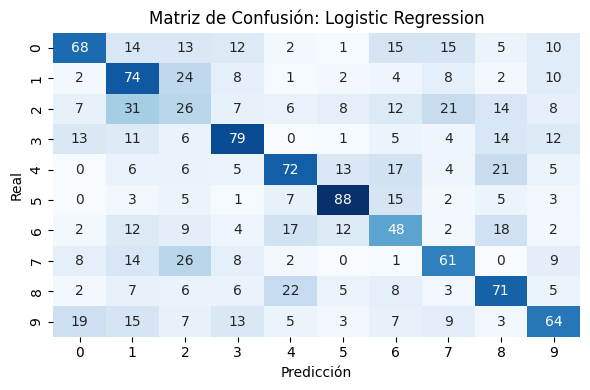


Entrenando: Random Forest
Accuracy: 0.4280
Mejores parámetros: {'max_depth': None, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.47      0.37      0.41       155
           1       0.34      0.67      0.45       135
           2       0.32      0.12      0.18       140
           3       0.50      0.45      0.47       145
           4       0.45      0.48      0.47       149
           5       0.56      0.67      0.61       129
           6       0.36      0.35      0.35       126
           7       0.43      0.50      0.46       129
           8       0.37      0.39      0.38       135
           9       0.47      0.32      0.38       145

    accuracy                           0.43      1388
   macro avg       0.43      0.43      0.42      1388
weighted avg       0.43      0.43      0.42      1388



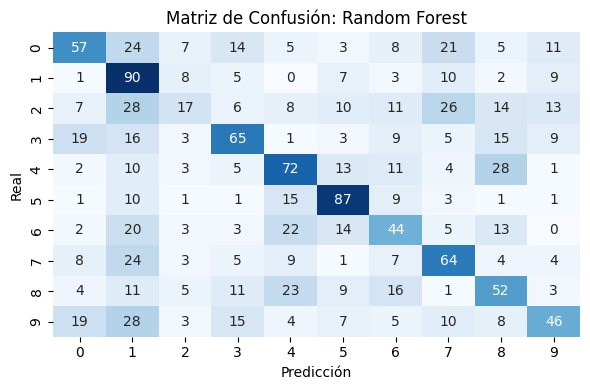


Entrenando: SVM (LinearSVC)
Accuracy: 0.4784
Mejores parámetros: {'C': 0.1}
              precision    recall  f1-score   support

           0       0.53      0.43      0.47       155
           1       0.41      0.56      0.48       135
           2       0.27      0.12      0.17       140
           3       0.54      0.61      0.57       145
           4       0.49      0.50      0.49       149
           5       0.61      0.75      0.67       129
           6       0.37      0.36      0.36       126
           7       0.44      0.53      0.48       129
           8       0.46      0.49      0.47       135
           9       0.54      0.46      0.50       145

    accuracy                           0.48      1388
   macro avg       0.47      0.48      0.47      1388
weighted avg       0.47      0.48      0.47      1388



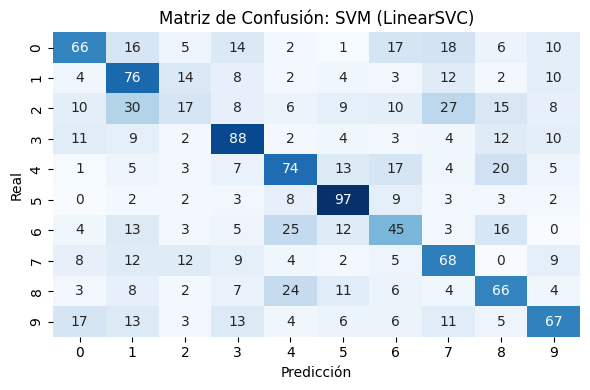


Entrenando: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:10:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.4589
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.52      0.42      0.46       155
           1       0.44      0.61      0.51       135
           2       0.28      0.24      0.26       140
           3       0.53      0.48      0.51       145
           4       0.50      0.48      0.49       149
           5       0.62      0.66      0.64       129
           6       0.38      0.40      0.39       126
           7       0.47      0.48      0.47       129
           8       0.38      0.42      0.40       135
           9       0.46      0.43      0.44       145

    accuracy                           0.46      1388
   macro avg       0.46      0.46      0.46      1388
weighted avg       0.46      0.46      0.46      1388



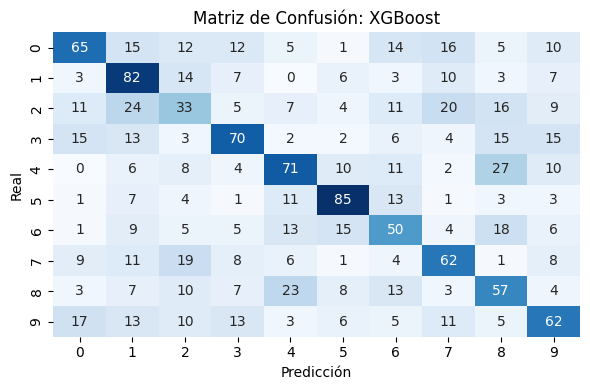

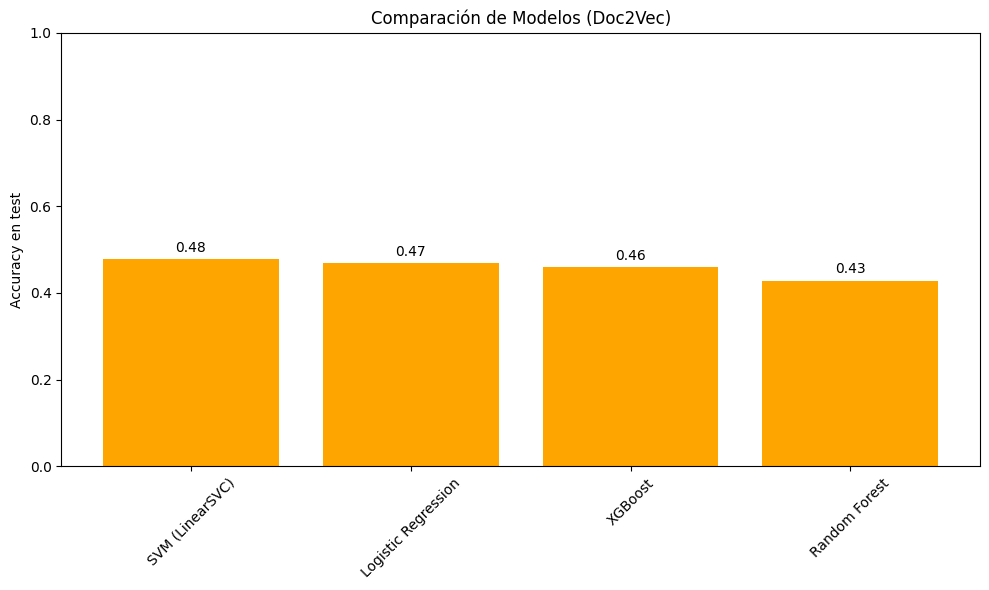


Guardando mejor modelo: SVM (LinearSVC) con Accuracy = 0.4784


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# 1. Cargar datos
X_raw = df["Description_clean"]
y = df["Cluster"]

# 2. Preprocesamiento para Doc2Vec (tokenización básica con split)
tagged_data = [TaggedDocument(words=desc.lower().split(), tags=[i]) for i, desc in enumerate(X_raw)]

# 3. Entrenar modelo Doc2Vec
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=2, workers=4, epochs=40)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# 4. Convertir a vectores
X_vectors = np.array([doc2vec_model.infer_vector(desc.lower().split()) for desc in X_raw])

# 5. Split de datos
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42)

# 6. Definir modelos y grids
model_configs = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {"C": [0.1, 1, 10]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {"n_estimators": [100, 200], "max_depth": [None, 10, 20]}
    },
    "SVM (LinearSVC)": {
        "model": LinearSVC(),
        "params": {"C": [0.1, 1, 10]}
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [3, 6],
            "learning_rate": [0.05, 0.1]
        }
    }
}

# 7. GridSearch y evaluación
results = []
best_model = None
best_score = 0
best_name = ""

for name, config in model_configs.items():
    print(f"\nEntrenando: {name}")
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)

    y_pred = grid.best_estimator_.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc, grid.best_params_, grid.best_estimator_))

    print(f"Accuracy: {acc:.4f}")
    print(f"Mejores parámetros: {grid.best_params_}")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusión: {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    if acc > best_score:
        best_score = acc
        best_model = grid.best_estimator_
        best_name = name

# 8. Comparación visual
results.sort(key=lambda x: x[1], reverse=True)
names = [x[0] for x in results]
scores = [x[1] for x in results]

plt.figure(figsize=(10, 6))
bars = plt.bar(names, scores, color='orange')
plt.title("Comparación de Modelos (Doc2Vec)")
plt.ylabel("Accuracy en test")
plt.ylim(0, 1)
plt.xticks(rotation=45)
for bar, score in zip(bars, scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{score:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

# 9. Guardar el mejor modelo
print(f"\nGuardando mejor modelo: {best_name} con Accuracy = {best_score:.4f}")
joblib.dump(best_model, f"mejor_modelo_Doc2Vec_{best_name.replace(' ', '_')}.pkl")
doc2vec_model.save("modelo_doc2vec_entrenado.model")


## **Conslusiones Escenario 2:**

En el Escenario 2 se realizó la comparación entre cuatro modelos de clasificación supervisada —Regresión Logística, Random Forest, SVM (LinearSVC) y XGBoost— con el objetivo de identificar cuál de ellos ofrece el mejor desempeño sobre un conjunto de datos multiclase, evaluado con una muestra de 1388 instancias distribuidas en 10 clases. Los resultados revelan que ninguno de los modelos alcanza un desempeño sobresaliente, lo cual sugiere que el problema puede ser complejo, que los datos presentan solapamiento entre clases. No obstante, el análisis detallado de las métricas permite extraer conclusiones relevantes para mejorar el enfoque y futuras iteraciones.

El mejor modelo resultó ser SVM con kernel lineal, con una accuracy del 47.84% y un rendimiento balanceado entre las diferentes clases. Aunque esta precisión es modesta, supera a los demás modelos por un pequeño margen. Es destacable su comportamiento especialmente en las clases 3 y 5, donde logra un f1-score de 0.57 y 0.67 respectivamente, lo que indica que en estas categorías logra una buena relación entre precisión y exhaustividad. Sin embargo, presenta bajo rendimiento en la clase 2 (f1-score de 0.17), que fue difícil para todos los modelos, lo cual podría reflejar una falta de características discriminantes para esa clase o una cantidad insuficiente de ejemplos representativos.

La Regresión Logística, con un accuracy de 46.90%, también mostró un desempeño relativamente competitivo, con resultados similares a los de SVM en varias clases. Por ejemplo, la clase 5 presenta un buen desempeño (f1-score de 0.67) al igual que en la clase 3 (0.55), lo cual sugiere que la naturaleza lineal de los modelos puede estar capturando ciertas estructuras del espacio de características de manera adecuada. Los mejores resultados se obtuvieron con un parámetro de regularización C=0.1, lo que indica que una mayor penalización (menos complejidad del modelo) resulta más favorable.

En contraste, el modelo de Random Forest, pese a su complejidad y capacidad para modelar relaciones no lineales, alcanzó una accuracy de apenas 42.80%, la más baja de los cuatro. A pesar de esto, tuvo un buen recall en la clase 1 (0.67), lo cual sugiere que es relativamente eficaz en recuperar esa categoría, aunque a expensas de la precisión (0.34), lo que puede implicar muchos falsos positivos. La dispersión en los resultados entre clases también refleja que el modelo puede estar sobreajustando a ciertas estructuras del conjunto de entrenamiento sin generalizar bien.

Por su parte, XGBoost, con una accuracy de 45.89%, presentó un rendimiento intermedio. Aunque superó a Random Forest, sus métricas indican que tampoco logró una clara ventaja. Como en los demás casos, las clases 3 y 5 fueron las que obtuvieron mejores resultados (f1-score de 0.51 y 0.64 respectivamente), lo que refuerza la hipótesis de que hay clases que son inherentemente más separables que otras en el espacio de características. Es importante notar que se usaron 200 estimadores con profundidad 6 y una tasa de aprendizaje de 0.1, lo que representa una configuración razonable, pero quizás aún no óptima.

En términos generales ningún modelo supera el 48% de accuracy, lo que sugiere que el conjunto de datos representa un reto considerable para los clasificadores tradicionales. Esto puede deberse a múltiples factores: clases con fronteras poco definidas, alta dimensionalidad, datos no linealmente separables, ruido o incluso desbalance entre clases. Las métricas de precisión, recall y f1-score por clase refuerzan esta idea, mostrando que los modelos tienden a tener un desempeño desigual y que ciertos grupos (como la clase 2) son sistemáticamente difíciles de clasificar. Esto podría motivar un análisis más profundo del preprocesamiento de los datos, el balance entre clases, la ingeniería de características o incluso la exploración de modelos más sofisticados como redes neuronales o enfoques híbridos.

Se eligió como mejor modelo a SVM (LinearSVC), no porque haya alcanzado una precisión destacable, sino por ser el más consistente dentro de un escenario desafiante. Este resultado ofrece un punto de partida razonable, pero también evidencia la necesidad de continuar explorando estrategias complementarias para mejorar el rendimiento global del sistema de clasificación.

# **Escenario 3: Modelo Pre - Entrenado**

Como complemento a los modelos previamente implementados, se propone un nuevo escenario que utiliza una versión ligera de BERT para generar representaciones vectoriales de textos. El código comienza importando las librerías necesarias: transformers para acceder al modelo preentrenado y al tokenizador de BERT; torch para gestionar tensores y operaciones en GPU o CPU; tqdm para mostrar el progreso en tiempo real; joblib para guardar modelos entrenados; numpy y pandas para manipulación de datos; matplotlib y seaborn para visualización; y bibliotecas de scikit-learn y xgboost para los modelos de clasificación y evaluación.

El conjunto de datos original es balanceado tomando una cantidad igual de muestras de cada clase, igual al tamaño de la clase menos representada. Esto se hace con el fin de evitar que los modelos aprendan sesgos hacia las clases con mayor representación. A partir del DataFrame balanceado, se extraen dos listas: texts con los textos limpios y labels con sus respectivas etiquetas de clase.

En lugar del modelo tradicional de BERT, se opta por una variante más ligera y rápida: "prajjwal1/bert-tiny": este modelo es una versión extremadamente ligera del modelo BERT, diseñada para ofrecer tiempos de inferencia rápidos y bajo consumo de recursos computacionales. Está basado en la arquitectura original de BERT, pero con una estructura mucho más reducida, lo que lo hace ideal para tareas donde se requieren resultados rápidos o donde el hardware disponible tiene limitaciones importantes, como en entornos de producción con poca memoria o durante el desarrollo de prototipos. Cuenta con solo 2 capas (transformer layers), utiliza 2 cabezas de atención y tiene un tamaño de embedding de 128 dimensiones, lo que resulta en un total de aproximadamente 4.4 millones de parámetros, en contraste con los más de 110 millones de BERT-base. A pesar de su tamaño reducido, conserva la compatibilidad con el tokenizador de BERT-base (uncased), permitiendo que los textos se preprocesen de la misma manera que en el modelo original, utilizando un vocabulario de 30,522 tokens y admitiendo secuencias de hasta 512 tokens de longitud.

La principal ventaja es su velocidad y eficiencia: puede ejecutarse sin problemas en CPU o en GPUs modestas como las que ofrece Google Colab gratuito, y es especialmente útil para tareas que no requieren una comprensión lingüística profunda, como clasificación de textos simples, análisis de sentimientos básico, o cuando se desea generar embeddings rápidos como entrada para modelos de machine learning clásicos. Gracias a su diseño compacto, permite generar representaciones vectoriales de textos de manera muy eficiente, lo cual es útil en flujos de trabajo donde se requiere trabajar con muchos datos en poco tiempo.

Sin embargo, esta ligereza implica también algunas limitaciones importantes. Al tener solo dos capas y una menor cantidad de parámetros, su capacidad para capturar relaciones semánticas complejas y estructuras lingüísticas profundas es limitada. Por esta razón, bert-tiny no es recomendable para tareas de lenguaje natural que requieren una comprensión más rica del contexto, como el reconocimiento de entidades complejas, la respuesta a preguntas detalladas o el análisis semántico fino. En estos casos, sería preferible optar por versiones más robustas como bert-base, bert-small o incluso bert-large, si el hardware lo permite.

Este modelo, junto con su tokenizador, se carga usando AutoTokenizer.from_pretrained() y AutoModel.from_pretrained(). Para garantizar que los pesos del modelo no se modifiquen durante la inferencia, se establece el modo de evaluación con bert_model.eval(), y se define el dispositivo de ejecución (cuda o cpu) para optimizar el rendimiento del procesamiento.

Luego, se define la función get_bert_embedding(), que se encarga de transformar un texto en su correspondiente embedding utilizando el modelo BERT. Esta función tokeniza el texto, lo ajusta al formato requerido por el modelo (128 tokens, con truncamiento y padding), y extrae la salida del token [CLS], que representa una visión general del texto completo. El vector resultante se convierte a un array de NumPy para su posterior uso.

Una vez definida esta función, se aplica sobre todos los textos del conjunto de datos para generar una matriz de características X_embeddings, que contiene los vectores de embedding de cada texto. Las etiquetas de clase se almacenan en un arreglo y.

Posteriormente, se realiza la división de los datos en un conjunto de entrenamiento (80%) y otro de prueba (20%) utilizando train_test_split(), asegurando una distribución estratificada de las clases. Tambien se definen cuatro modelos de clasificación: regresión logística, random forest, SVM lineal y XGBoost. Para cada uno, se especifican conjuntos de hiperparámetros que serán explorados mediante GridSearchCV, una técnica que realiza búsqueda exhaustiva con validación cruzada para encontrar la mejor combinación de parámetros. Los modelos se evalúan usando la métrica de precisión (accuracy).

Durante el entrenamiento, se ajusta cada modelo sobre el conjunto de entrenamiento y se predicen las etiquetas del conjunto de prueba. Se imprime el valor de precisión alcanzado, los mejores hiperparámetros encontrados, y un informe de clasificación (classification_report) que muestra métricas detalladas como precisión, exhaustividad y F1-score. Además, se genera una matriz de confusión visualizada mediante seaborn, que permite identificar patrones en los errores de clasificación.

Al finalizar la evaluación de todos los modelos, se identifica aquel que obtuvo el mejor desempeño (mayor precisión en el conjunto de prueba). Este modelo es guardado con joblib.dump() para su reutilización futura sin necesidad de repetir el proceso de entrenamiento.

In [ ]:
# ---**INGRESE SU CÓDIGO**---
!pip install transformers
!pip install --upgrade --force-reinstall numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 90.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


<ipython-input-20-de6318d0019c>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby("Cluster").apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warning

config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/numpy/_core/_dtype.py:106: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if dtype.type == np.bool:


pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

Generando embeddings con BERT ligero...


  1%|          | 51/6940 [00:00<00:51, 132.65it/s]

model.safetensors:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

100%|██████████| 6940/6940 [00:45<00:00, 152.27it/s]



Entrenando: Logistic Regression
Accuracy: 0.5432
Mejores parámetros: {'C': 0.1}
              precision    recall  f1-score   support

           0       0.57      0.58      0.57       139
           1       0.61      0.53      0.57       138
           2       0.38      0.27      0.31       139
           3       0.50      0.56      0.53       139
           4       0.54      0.56      0.55       139
           5       0.71      0.81      0.75       139
           6       0.45      0.41      0.43       139
           7       0.61      0.65      0.63       139
           8       0.45      0.51      0.48       138
           9       0.57      0.55      0.56       139

    accuracy                           0.54      1388
   macro avg       0.54      0.54      0.54      1388
weighted avg       0.54      0.54      0.54      1388



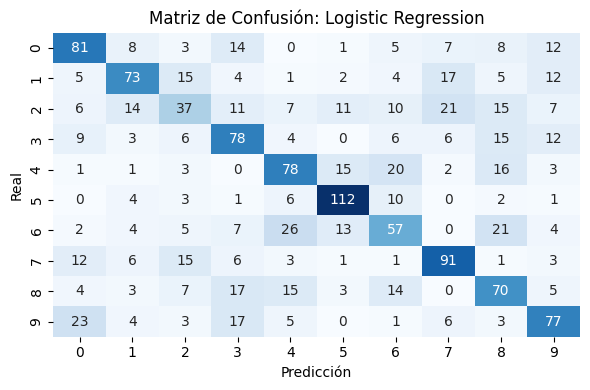


Entrenando: Random Forest
Accuracy: 0.5245
Mejores parámetros: {'max_depth': None, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       139
           1       0.53      0.59      0.55       138
           2       0.42      0.20      0.27       139
           3       0.48      0.53      0.51       139
           4       0.46      0.53      0.49       139
           5       0.62      0.73      0.67       139
           6       0.43      0.40      0.41       139
           7       0.59      0.68      0.63       139
           8       0.48      0.48      0.48       138
           9       0.60      0.55      0.57       139

    accuracy                           0.52      1388
   macro avg       0.52      0.52      0.52      1388
weighted avg       0.52      0.52      0.52      1388



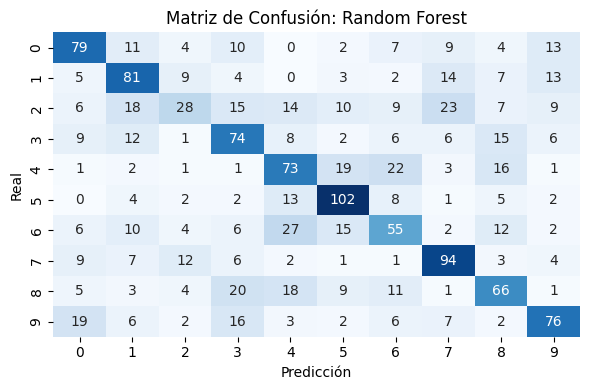


Entrenando: SVM (LinearSVC)
Accuracy: 0.5367
Mejores parámetros: {'C': 0.1}
              precision    recall  f1-score   support

           0       0.57      0.58      0.58       139
           1       0.62      0.54      0.57       138
           2       0.45      0.19      0.26       139
           3       0.49      0.56      0.52       139
           4       0.47      0.58      0.52       139
           5       0.67      0.80      0.73       139
           6       0.44      0.40      0.42       139
           7       0.60      0.71      0.65       139
           8       0.45      0.46      0.45       138
           9       0.55      0.56      0.56       139

    accuracy                           0.54      1388
   macro avg       0.53      0.54      0.53      1388
weighted avg       0.53      0.54      0.53      1388



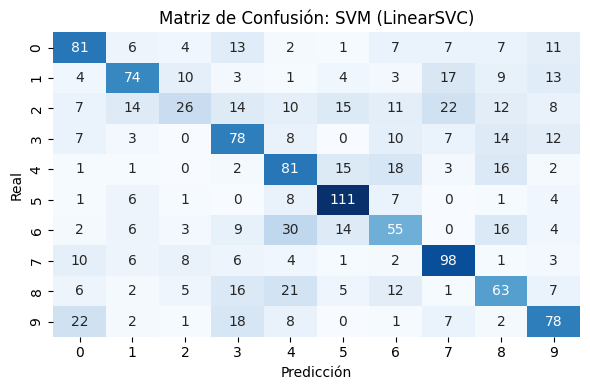


Entrenando: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:50:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.5295
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.56      0.53      0.54       139
           1       0.58      0.60      0.59       138
           2       0.35      0.29      0.31       139
           3       0.48      0.55      0.52       139
           4       0.49      0.53      0.51       139
           5       0.67      0.65      0.66       139
           6       0.41      0.40      0.41       139
           7       0.65      0.69      0.67       139
           8       0.46      0.48      0.47       138
           9       0.61      0.58      0.59       139

    accuracy                           0.53      1388
   macro avg       0.53      0.53      0.53      1388
weighted avg       0.53      0.53      0.53      1388



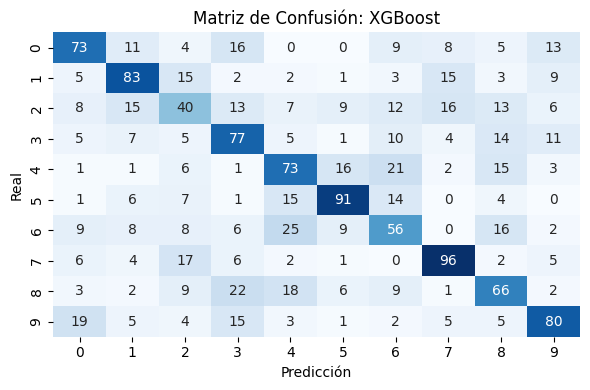

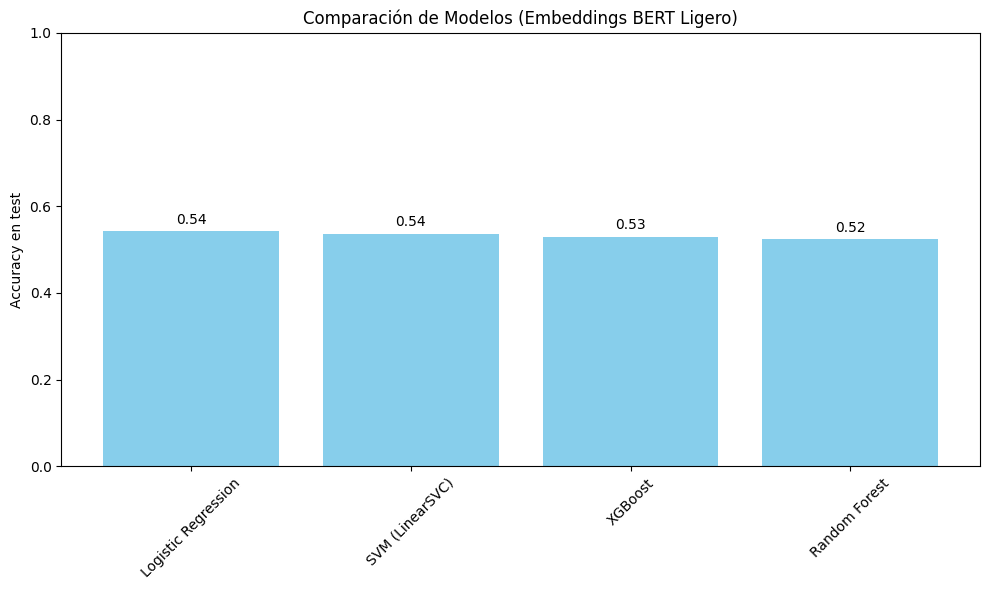


Guardando mejor modelo: Logistic Regression con Accuracy = 0.5432


['mejor_modelo_BERT_LIGERO_Logistic_Regression.pkl']

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from tqdm import tqdm
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Balancear el dataset según la clase menos representada
min_count = df["Cluster"].value_counts().min()
balanced_df = df.groupby("Cluster").apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)

# Textos y etiquetas
texts = balanced_df["Description_clean"].tolist()
labels = balanced_df["Cluster"].tolist()

# Tokenizer y modelo BERT ligero
model_name = "prajjwal1/bert-tiny"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModel.from_pretrained(model_name)
bert_model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

# Función para obtener el embedding [CLS]
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=128)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    with torch.no_grad():
        outputs = bert_model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
    return cls_embedding

# Obtener embeddings
print("Generando embeddings con BERT ligero...")
X_embeddings = np.array([get_bert_embedding(text) for text in tqdm(texts)])
y = np.array(labels)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42, stratify=y)

# Modelos y grids
model_configs = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {"C": [0.1, 1, 10]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {"n_estimators": [100, 200], "max_depth": [None, 10, 20]}
    },
    "SVM (LinearSVC)": {
        "model": LinearSVC(),
        "params": {"C": [0.1, 1, 10]}
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [3, 6],
            "learning_rate": [0.05, 0.1]
        }
    }
}

# GridSearchCV + evaluación
results = []
best_model = None
best_score = 0
best_name = ""

for name, config in model_configs.items():
    print(f"\nEntrenando: {name}")
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)

    y_pred = grid.best_estimator_.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc, grid.best_params_, grid.best_estimator_))

    print(f"Accuracy: {acc:.4f}")
    print(f"Mejores parámetros: {grid.best_params_}")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusión: {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    if acc > best_score:
        best_score = acc
        best_model = grid.best_estimator_
        best_name = name

# Comparación visual
results.sort(key=lambda x: x[1], reverse=True)
names = [x[0] for x in results]
scores = [x[1] for x in results]

plt.figure(figsize=(10, 6))
bars = plt.bar(names, scores, color='skyblue')
plt.title("Comparación de Modelos (Embeddings BERT Ligero)")
plt.ylabel("Accuracy en test")
plt.ylim(0, 1)
plt.xticks(rotation=45)
for bar, score in zip(bars, scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{score:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Guardar modelo
print(f"\nGuardando mejor modelo: {best_name} con Accuracy = {best_score:.4f}")
joblib.dump(best_model, f"mejor_modelo_BERT_LIGERO_{best_name.replace(' ', '_')}.pkl")

# **Conclusiones Escenario 3**

Se entrenaron y compararon cuatro modelos de clasificación multiclase: Regresión Logística, Random Forest, SVM (LinearSVC) y XGBoost. El modelo que obtuvo el mejor desempeño general fue la Regresión Logística, con un accuracy del 54.32%, seguido muy de cerca por SVM con 53.67%, XGBoost con 52.95% y, finalmente, Random Forest con 52.45%. Sin embargo, las diferencias en accuracy entre los modelos son muy pequeñas, lo cual indica que todos presentan un rendimiento similar y relativamente bajo, sugiriendo que el problema de clasificación es complejo y posiblemente existen limitaciones en la calidad o representatividad de las características utilizadas.

Al observar el desempeño por clase, se evidencia que la clase 5 presenta los mejores resultados de manera consistente en todos los modelos, con f1-scores que oscilan entre 0.66 y 0.75, lo que indica que los ejemplos de esta clase son fácilmente reconocibles, probablemente debido a características bien definidas o una separación clara en el espacio de representación. Por el contrario, la clase 2 muestra un rendimiento pobre en todos los modelos, con f1-scores muy bajos (entre 0.26 y 0.31) y recalls particularmente bajos, lo que sugiere que el modelo tiene serias dificultades para identificar correctamente los ejemplos de esta clase, ya sea por ambigüedad, ruido o falta de representatividad en las características que se utilizaron.

El comportamiento de los modelos en las demás clases es bastante heterogéneo, con f1-scores que fluctúan en un rango intermedio, lo que refuerza la idea de que el conjunto de datos presenta desafíos importantes para la clasificación automática. A pesar de que el soporte por clase es balanceado, los bajos valores promedio de precisión, recall y f1-score (todos cercanos al 0.53 o 0.54) indican que el modelo no logra capturar de manera efectiva la estructura del problema.

Aunque la Regresión Logística se destaca levemente como el mejor modelo, los resultados generales son modestos y sugieren la necesidad de mejorar la representación de los datos, ya sea mediante técnicas de ingeniería de características, selección de atributos relevantes, uso de modelos más complejos o incluso un replanteamiento del enfoque de aprendizaje, como el uso de métodos basados en representación semántica o modelos de tipo embedding. También sería recomendable analizar en detalle la matriz de confusión y explorar combinaciones de modelos (ensembles) para mejorar la clasificación.

# **Escenario 4: Zero-Shot**

En este nuevo escenario, el objetivo sigue siendo realizar una clasificación temática automática de descripciones de libros utilizando ahora un enfoque de Zero-Shot Learning, aprovechando el modelo preentrenado facebook/bart-large-mnli disponible en la biblioteca transformers de Hugging Face.

Técnica que resulta especialmente útil cuando no se dispone de un modelo específico entrenado sobre las categorías de interés, permitiendo asignar etiquetas a los textos sin la necesidad de una fase previa de entrenamiento supervisado sobre un conjunto origibario de datos etiquetados.

El punto de partida es un conjunto de datos original con el que hemos venido trabajando en los tres escenarios anteriores, que contiene las columnas: título (Title_clean), autores (Authors_clean), una descripción del contenido (Description_clean) y un número de cluster (Cluster) asignado previamente en la etapa de preprocesamiento mediante un algoritmo de agrupamiento no supervisado. Lo que permitio definir el conjunto de diez etiquetas representativas que abarcan el espectro temático, denominadas en este escenario como sigue:

    0: "a book about social sciences",
    1: "a children's book",
    2: "a young adult fiction book",
    3: "a biography",
    4: "a romance novel",
    5: "a fantasy story",
    6: "a science fiction novel",
    7: "a book about health and technology",
    8: "a work of literature",
    9: "a book about history and religion"

Cuando se utiliza un enfoque de clasificación zero-shot, como en el caso del modelo facebook/bart-large-mnli, es fundamental que las etiquetas proporcionadas estén formuladas como frases completas en lenguaje natural y no simplemente como categorías abstractas. Esto se debe a que el modelo no trabaja con clases predefinidas, sino que evalúa la similitud semántica entre el texto a clasificar —por ejemplo, la descripción de un libro— y cada una de las frases propuestas como posibles etiquetas.

El modelo realiza la comparación y determina cuál de ellas describe mejor el contenido. POr el contrario, si se utilizan etiquetas demasiado cortas o genéricas, como “romance” o “fiction” por ejemplo, el modelo puede tener dificultades para interpretar correctamente su significado y hacer asociaciones precisas.

Las expresiones más completas como “a romance novel” o “a book about social sciences” ofrecen un contexto más rico y específico, facilitandole una clasificación más exacta. Decir “a romance novel” es mucho más claro para el modelo que simplemente “romance”, y “a book about social sciences” proporciona una información mucho más detallada que usar solo “social” o “sociology”.

Entre lo beneficios de utilizar este enfoque se encuentra, la mejora de una comprensión semántica, dadoq ue el modelo fue entrenado para procesar lenguaje natural y responde mejor a frases completas. Tambien, incrementa la precisión de la clasificación, al permitir que el modelo distinga con mayor claridad entre categorías que pueden ser similares o solaparse. Por último, ayuda a evitar ambigüedades, puesto que las palabras por sí solas llegan a tener múltiples interpretaciones, a diferencia de una frase completa que suele dejar claro el contexto e intención de la categoría.

Basandonos en este enfoque se construyó el pipeline de clasificación zero-shot para cada descripción de libro (Description_clean). Se ejecutó el modelo para que seleccionara, de entre las diez etiquetas candidatas, aquella que más se ajustara al contenido del texto. El modelo usado devuelve tanto la etiqueta más probable como un puntaje de confianza asociado, junto con una lista de las tres etiquetas más probables ordenadas por su puntuación. Esta información fue almacenada en tres nuevas columnas del dataset: Top_Label, Top_Score y Top_3_Labels.

Para acelerar el proceso, se optó por ejecutar el modelo utilizando una TPU (Tensor Processing Unit) de Google Colab que es un tipo de procesador especializado para el procesamiento de modelos de aprendizaje automático, permitió reducir significativamente los tiempos de clasificación, acelerando la ejecución en comparación con el uso de CPU o GPU. Esta optimización fue clave para procesar el gran tamaño de descripciones de los libros que se tienen de una manera mas eficiente.

Una vez completado el proceso de clasificación para todas las filas, los resultados fueron almacenados en un nuevo archivo CSV titulado dataset_clasificado_con_scores.csv, que incluye tanto los datos originales como las predicciones realizadas por el modelo.

Para evaluar la calidad de la clasificación automática, se estableció una correspondencia entre los números de cluster originales y las categorías temáticas que representan. A partir de esta correspondencia, se generó una columna con las etiquetas reales (True_Label) y se compararon con las etiquetas predichas (Top_Label) por el modelo. La evaluación incluyó el cálculo de métricas estándar como precisión, recall y F1-score mediante classification_report, así como la visualización de una matriz de confusión que permite identificar los patrones de aciertos y errores en la clasificación.

In [ ]:
!pip install transformers

In [ ]:
!pip install numpy --force-reinstall --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 89.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [ ]:
import torch
print(torch.cuda.is_available())  # Esto debería devolver True si la GPU está habilitada
print(torch.cuda.get_device_name(0))

True
Tesla T4


In [ ]:
from transformers import pipeline
import pandas as pd
from tqdm import tqdm

# Asegúrate de que el DataFrame df esté cargado previamente, por ejemplo:
# df = pd.read_csv("tu_archivo.csv")

# Configurar el clasificador zero-shot usando un modelo más potente
classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli",  # Modelo recomendado para zero-shot en inglés
    device=0  # Usa GPU si está disponible
)

# Etiquetas reformuladas para que sean más comprensibles para el modelo
candidate_labels = [
    "a book about social sciences",
    "a children's book",
    "a young adult fiction book",
    "a biography",
    "a romance novel",
    "a fantasy story",
    "a science fiction novel",
    "a book about health and technology",
    "a work of literature",
    "a book about history and religion"
]

# Inicializar listas para almacenar resultados
top_labels = []
top_scores = []
top3_labels = []

# Tamaño del lote
batch_size = 32

print("Clasificando textos...")

# Procesar descripciones en lotes
for i in tqdm(range(0, len(df), batch_size)):
    batch_desc = df["Description_clean"][i:i + batch_size].tolist()

    # Clasificación zero-shot para el lote actual
    batch_result = classifier(batch_desc, candidate_labels, multi_label=False)

    # Procesar los resultados
    for result in batch_result:
        # Extraer la etiqueta con mayor puntaje
        top_labels.append(result["labels"][0])
        top_scores.append(result["scores"][0])
        # Extraer las tres mejores etiquetas
        top3 = result["labels"][:3]
        top3_labels.append(", ".join(top3))

# Agregar columnas al DataFrame original
df["Top_Label"] = top_labels
df["Top_Score"] = top_scores
df["Top_3_Labels"] = top3_labels

# Guardar el DataFrame con las nuevas columnas
df.to_csv("dataset_clasificado_con_scores.csv", index=False)

print("¡Listo! Archivo guardado como 'dataset_clasificado_con_scores.csv'.")



config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


Clasificando textos...


100%|██████████| 217/217 [41:12<00:00, 11.39s/it]


¡Listo! Archivo guardado como 'dataset_clasificado_con_scores.csv'.


Reporte de Clasificación:
                                    precision    recall  f1-score   support

                       a biography       0.21      0.45      0.28       694
a book about health and technology       0.39      0.03      0.05       694
 a book about history and religion       0.59      0.14      0.22       694
      a book about social sciences       0.53      0.03      0.06       694
                 a children's book       0.59      0.29      0.39       694
                   a fantasy story       0.47      0.34      0.40       694
                   a romance novel       0.62      0.04      0.08       694
           a science fiction novel       0.55      0.01      0.02       694
              a work of literature       0.13      0.80      0.22       694
        a young adult fiction book       0.21      0.00      0.01       694

                          accuracy                           0.21      6940
                         macro avg       0.43      0.21     

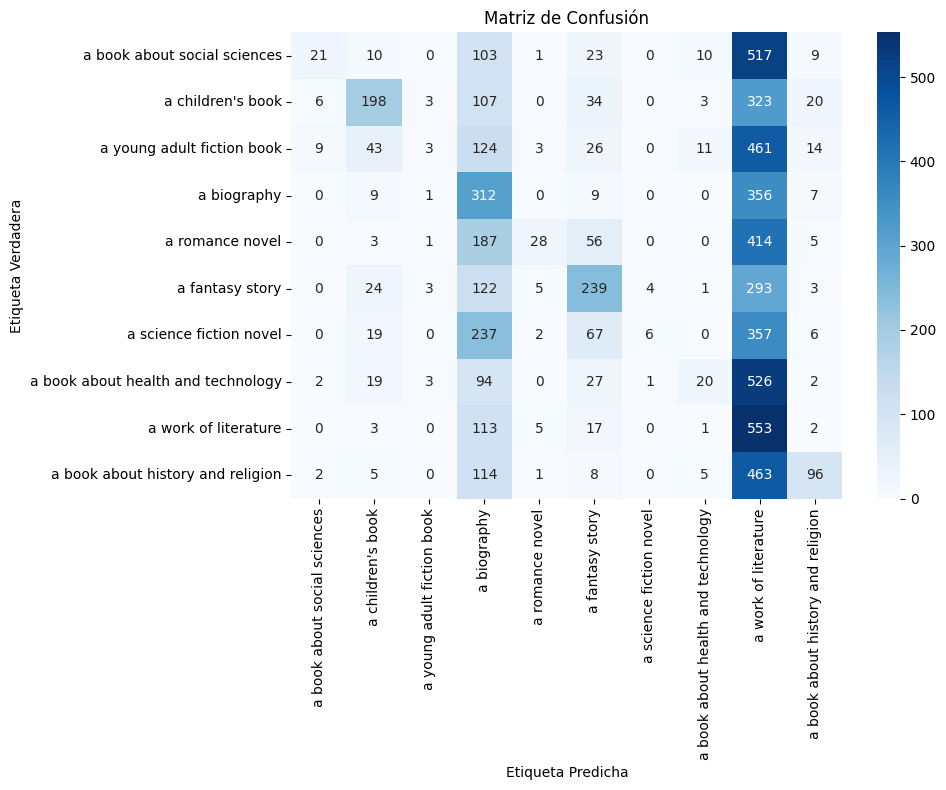

In [ ]:
cluster_to_label = {
    0: "a book about social sciences",
    1: "a children's book",
    2: "a young adult fiction book",
    3: "a biography",
    4: "a romance novel",
    5: "a fantasy story",
    6: "a science fiction novel",
    7: "a book about health and technology",
    8: "a work of literature",
    9: "a book about history and religion"
}

# Aplicamos el mapeo al DataFrame
df["True_Label"] = df["Cluster"].map(cluster_to_label)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(df["True_Label"], df["Top_Label"], zero_division=0))

# Matriz de confusión
conf_matrix = confusion_matrix(df["True_Label"], df["Top_Label"], labels=list(cluster_to_label.values()))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=cluster_to_label.values(),
            yticklabels=cluster_to_label.values())
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **Conclusiones Escenario 4:**

Tras aplicar un modelo de clasificación, se obtuvo un reporte de desempeño que refleja por un lado las posibilidades y por otro las grandes limitaciones de este enfoque para categorizar descripciones de libros en diez etiquetas temáticas formuladas en lenguaje natural.

Aunque la elección de frases completas como etiquetas fue acertada desde el punto de vista semántico, los resultados revelan un desempeño general limitado, lo que permite reflexionar de manera más profunda sobre la naturaleza propia de los datos, las capacidades del modelo y la estructura de la tarea.

El primer elemento que llama la atención es la baja precisión global, con una exactitud (accuracy) del 21%, lo que significa que en promedio solo uno de cada cinco textos fue correctamente clasificado por el modelo según su etiqueta real. Esta cifra, aunque modesta, es comprensible dentro del contexto de clasificación zero-shot, ya que el modelo no fue entrenado específicamente con estas categorías, sino que realiza inferencias basadas únicamente en su entendimiento semántico general del lenguaje. La complejidad de la tarea se ve acentuada por el hecho de que muchas de las categorías comparten elementos discursivos, lo que hace difícil establecer fronteras claras sin entrenamiento supervisado, aunque en los tres escenarios anteriores tampoco se obtuvieron resultados muy satisfactorios.

Analizando el reporte por clases, se observa que algunas etiquetas tuvieron un mejor desempeño relativo que otras. Por ejemplo, la categoría “a work of literature” alcanzó un recall del 80%, lo que indica que una gran proporción de los textos etiquetados originalmente como literatura fueron reconocidos como tales por el modelo. Sin embargo, su precisión fue apenas del 13%, lo cual sugiere que muchos otros textos, que no pertenecían a esta categoría, también fueron erróneamente clasificados como literatura. Esto revela un patrón importante: el modelo tiende a sobreasignar ciertas clases más genéricas o ambiguas, posiblemente porque sus descripciones comparten vocabulario o tono con otros géneros.

Situaciones similares se observan en otras categorías. “A biography” obtuvo un recall de 45% y una precisión del 21%, lo que sugiere que el modelo logra identificar algunos elementos característicos del lenguaje biográfico, pero aún incurre en muchas clasificaciones incorrectas. Por el contrario, categorías como “a book about health and technology” o “a science fiction novel” presentaron valores muy bajos tanto en precisión como en recall, reflejando una mayor dificultad para reconocer patrones consistentes en las descripciones. Es probable que esto se deba a que los textos asociados a estas clases no contengan términos explícitos que el modelo asocie fuertemente con los conceptos de “tecnología”, “ciencia” o “futurismo”, lo que complica su identificación a través del puro análisis semántico.

Otra observación clave es que, a pesar de que todas las categorías tienen el mismo número de muestras (694), el rendimiento no es homogéneo. Lo que evidencia que la dificultad no está en algun desbalance de clases, sino en la ambigüedad lingüística y en la falta de rasgos distintivos claros en muchas de las descripciones. Por ejemplo, categorías como “a young adult fiction book” o “a romance novel” obtuvieron valores de f1-score cercanos a cero, lo cual puede ser consecuencia de descripciones poco informativas o de una gran superposición temática con otras clases como literatura, fantasía o biografía.

Con los resultados obtenidos se nos permite concluir que el enfoque zero-shot con etiquetas formuladas en lenguaje natural puede ofrecer una primera aproximación útil para la clasificación de textos en ausencia de datos etiquetados, su eficacia depende en gran medida de la claridad semántica de las descripciones, de la diferenciación entre categorías y del entrenamiento previo del modelo. La ambigüedad inherente a ciertos géneros y la similitud lingüística entre ellos representan un desafío considerable, que deberia entrarse a evaluar con tecnicas que permitan realizar estas correcciones. Por ejemplo, una redefinición de las etiquetas en términos más distintivos.


# **Escenario 5: Cluster de las Descripciones**



In [ ]:
#!pip install plotly --quiet

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Descargar stopwords si no están
nltk.download('stopwords')

# Asegúrate de tener el DataFrame 'df' cargado con la columna 'Description_clean'
df['Description_clean'] = df['Description_clean'].astype(str).str.lower()

# TF-IDF
stop_words = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=2)
X = vectorizer.fit_transform(df['Description_clean'])

# KMeans Clustering con 10 clústeres
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# PCA 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X.toarray())

# Añadir componentes al DataFrame
df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]
df['PC3'] = pca_result[:, 2]

# Visualización interactiva con Plotly
fig = px.scatter_3d(
    df, x='PC1', y='PC2', z='PC3',
    color=df['Cluster'].astype(str),
    title='Clustering de Películas (PCA - 3D, 10 Clústeres)',
    labels={'color': 'Cluster'},
    width=800, height=600
)

fig.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# 7. Explorar los resultados por clúster
for i in range(n_clusters):
    print(f"\n--- Cluster {i} ---")
    muestras = df[df['Cluster'] == i][['Title_clean', 'Description_clean']].head(3)
    print(muestras.to_string(index=False))


--- Cluster 0 ---
                                             Title_clean                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [ ]:

import re
import nltk
from nltk.corpus import stopwords
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px

# Descargar stopwords
nltk.download('stopwords')

# Asegúrate de tener el DataFrame 'df' cargado y con la columna 'Description_clean'
df['Description_clean'] = df['Description_clean'].astype(str).str.lower()

# Preprocesamiento: stopwords y tokenización con expresiones regulares
stop_words = set(stopwords.words('english'))

def simple_tokenizer(text):
    tokens = re.findall(r'\b\w+\b', text)  # Extrae solo palabras alfanuméricas
    return [word for word in tokens if word not in stop_words]

# Crear documentos etiquetados para Doc2Vec
documents = [
    TaggedDocument(words=simple_tokenizer(text), tags=[str(i)])
    for i, text in enumerate(df['Description_clean'])
]

# Entrenar modelo Doc2Vec
model = Doc2Vec(documents, vector_size=100, window=5, min_count=2, workers=4, epochs=40)

# Obtener vectores del documento
doc_vectors = [model.dv[str(i)] for i in range(len(df))]

# Clustering con KMeans
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(doc_vectors)

# PCA para reducir a 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(doc_vectors)

# Añadir componentes principales al DataFrame
df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]
df['PC3'] = pca_result[:, 2]

# Visualización interactiva con Plotly
fig = px.scatter_3d(
    df, x='PC1', y='PC2', z='PC3',
    color=df['Cluster'].astype(str),
    title='Clustering de Descripciones (Doc2Vec + PCA 3D, 10 Clústeres)',
    labels={'color': 'Cluster'},
    width=800, height=600
)

fig.show()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
